Testing Tensorflow installation

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

## Building an Image Classifier Using the Sequential API

### Using Keras to load the dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights

array([[-0.01738491,  0.06794189, -0.05792225, ..., -0.0270114 ,
         0.01210071, -0.02300201],
       [ 0.00909888,  0.05588387,  0.05336918, ..., -0.05547069,
        -0.02701502,  0.04159772],
       [ 0.04028838,  0.0453911 ,  0.06993096, ...,  0.02554384,
        -0.01396299,  0.04198971],
       ...,
       [ 0.02652404, -0.01079462, -0.06045362, ..., -0.04604055,
        -0.02717271, -0.06542675],
       [ 0.03274949,  0.07250941,  0.05153391, ..., -0.01028522,
        -0.001975  ,  0.01508475],
       [ 0.04282274, -0.04713427,  0.00253767, ..., -0.0287269 ,
         0.03406269,  0.0097627 ]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

### Compiling the model

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7134 - accuracy: 0.7672 - val_loss: 0.5130 - val_accuracy: 0.8266
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4909 - accuracy: 0.8275 - val_loss: 0.4479 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4469 - accuracy: 0.8436 - val_loss: 0.4208 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4190 - accuracy: 0.8532 - val_loss: 0.4229 - val_accuracy: 0.8496
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3987 - accuracy: 0.8590 - val_loss: 0.3965 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3824 - accuracy: 0.8649 - val_loss: 0.3789 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3681 - accuracy: 0.8691 - val_loss: 0.3935 - val_accuracy:

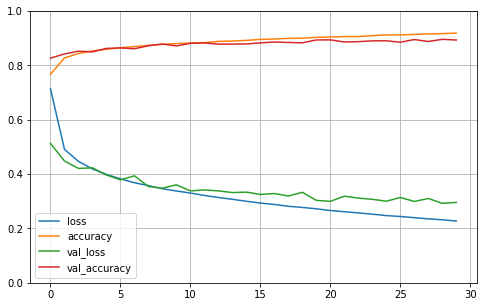

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 55.3058 - accuracy: 0.8655


[55.3057746887207, 0.8654999732971191]

### Using the model to make predictions

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 122ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 28ms/step


array([9, 2, 1], dtype=int64)

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]

In [29]:
y_new

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP Using the Sequential API

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                 validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 3.4327 - val_loss: 2.3979
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8641 - val_loss: 0.7696
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4947 - val_loss: 0.4680
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4229 - val_loss: 0.4280
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4033 - val_loss: 0.4178
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3946 - val_loss: 0.4070
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3853 - val_loss: 0.4009
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3809 - val_loss: 0.3959
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3758 - val_loss: 0.3909
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3715 - val_loss: 0.3857

# Building Complex Models Using the Funcional API

In [34]:
# Let's build such a neural network to tackle the California housing problem

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2220 - val_loss: 0.9842
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9565 - val_loss: 0.7300
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6866 - val_loss: 0.6639
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6344 - val_loss: 0.6268
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6019 - val_loss: 0.5995
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5786 - val_loss: 0.5815
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5604 - val_loss: 0.5636
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5454 - val_loss: 0.5533
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5333 - val_loss: 0.5388
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5241 - val_loss: 0.5301

In [37]:
# Adding an extra output

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [38]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [39]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.7800 - main_output_loss: 0.6921 - aux_output_loss: 1.5707 - val_loss: 0.5359 - val_main_output_loss: 0.4925 - val_aux_output_loss: 0.9269
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5133 - main_output_loss: 0.4707 - aux_output_loss: 0.8971 - val_loss: 0.5079 - val_main_output_loss: 0.4711 - val_aux_output_loss: 0.8389
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5447 - main_output_loss: 0.5140 - aux_output_loss: 0.8214 - val_loss: 0.5087 - val_main_output_loss: 0.4754 - val_aux_output_loss: 0.8087
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - main_output_loss: 0.4546 - aux_output_loss: 0.7624 - val_loss: 0.4859 - val_main_output_loss: 0.4560 - val_aux_output_loss: 0.7556
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4701 - main_output_loss: 0.4427 - aux_output_loss: 0.7171 - val_loss

In [40]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.4151 - main_output_loss: 0.4025 - aux_output_loss: 0.5288


In [41]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 94ms/step


In [42]:
y_pred_main, y_pred_aux

(array([[3.4210198 ],
        [0.91382015],
        [1.7843208 ]], dtype=float32),
 array([[3.1525319],
        [1.2677681],
        [1.7526836]], dtype=float32))

# Using the Subclassing API to Build Dynamic Models

In [43]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9149 - val_loss: 0.8794
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7771 - val_loss: 0.7261
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6917 - val_loss: 0.6768
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6468 - val_loss: 0.6411
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6157 - val_loss: 0.6147
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5904 - val_loss: 0.5931
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5713 - val_loss: 0.5747
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5552 - val_loss: 0.5596
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5421 - val_loss: 0.5478
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5312


In [47]:
model.save("my_keras_model.h5")

In [48]:
model = keras.models.load_model("my_keras_model.h5")

In [49]:
model.predict(X_new)

1/1 [==============================] - 0s 134ms/step


array([[3.039493  ],
       [0.71733993],
       [2.2993176 ]], dtype=float32)

In [50]:
model.save_weights("my_keras_weights.ckpt")

In [51]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5216
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5130
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5055
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4987
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4929
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4870
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4814
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4766
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4721
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4673


In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4638 - val_loss: 0.4782
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4607 - val_loss: 0.4704
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4571 - val_loss: 0.4682
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4540 - val_loss: 0.4660
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4513 - val_loss: 0.4618
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4492 - val_loss: 0.4617
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4468 - val_loss: 0.4613
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4441 - val_loss: 0.4587
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4422 - val_loss: 0.4545
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4401 - val_loss: 0.4621

In [55]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4404 - val_loss: 0.4571
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4383 - val_loss: 0.4521
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4370 - val_loss: 0.4530
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4489
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4324 - val_loss: 0.4484
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4311 - val_loss: 0.4465
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4297 - val_loss: 0.4437
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4282 - val_loss: 0.4450
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4260 - val_loss: 0.4408
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4245 - val_lo

363/363 [==============================] - 1s 3ms/step - loss: 0.3609 - val_loss: 0.3860
Epoch 82/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3607 - val_loss: 0.3848
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 0.3833
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3592 - val_loss: 0.3832
Epoch 85/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3593 - val_loss: 0.3863
Epoch 86/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3593 - val_loss: 0.3819
Epoch 87/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3578 - val_loss: 0.3823
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3576 - val_loss: 0.3816
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3568 - val_loss: 0.3811
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3565 - val_loss: 

In [56]:
# Write your own custom callbacks

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# Using TensorBoard for Visualization

In [57]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() 

In [58]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3510 - val_loss: 0.3742
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3505 - val_loss: 0.3758
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3508 - val_loss: 0.3742
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3494 - val_loss: 0.3755
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3494 - val_loss: 0.3745
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3481 - val_loss: 0.3728
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3487 - val_loss: 0.3733
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3474 - val_loss: 0.3721
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3468 - val_loss: 0.3713
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3466 - val_loss: 0.3715

In [59]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [67]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [68]:
# let’s create a KerasRegressor based on this build_model() function

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-68-85c530deea56>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [69]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1578 - val_loss: 0.6084
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6556 - val_loss: 0.5494
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5187 - val_loss: 0.5126
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4901 - val_loss: 0.4901
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4735 - val_loss: 0.4773
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4637 - val_loss: 0.4685
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4557 - val_loss: 0.4638
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4510 - val_loss: 0.4591
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4461 - val_loss: 0.4544
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4419 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 0.3874
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3627 - val_loss: 0.3874
Epoch 83/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3613 - val_loss: 0.3869
Epoch 84/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3584 - val_loss: 0.3869
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3585 - val_loss: 0.3867
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3585 - val_loss: 0.3981
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3573 - val_loss: 0.3841
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3568 - val_loss: 0.3867
Epoch 89/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3573 - val_loss: 0.3819
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3596 - val_loss: 

In [70]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1919 - val_loss: 0.6808
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6393 - val_loss: 0.6068
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5515 - val_loss: 0.5387
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5089 - val_loss: 0.5163
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4843 - val_loss: 0.4885
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4738 - val_loss: 0.4885
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4552 - val_loss: 0.4684
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4472 - val_loss: 0.4654
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4344 - val_loss: 0.4575
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4324 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.2985 - val_loss: 0.3410
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2941 - val_loss: 0.3439
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2934 - val_loss: 0.3449
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2933 - val_loss: 0.3434
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2919 - val_loss: 0.3728
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2940 - val_loss: 0.3534
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2915 - val_loss: 0.3451
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2904 - val_loss: 0.3397
Epoch 89/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2951 - val_loss: 0.3415
Epoch 90/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2898 - val_loss: 

Epoch 61/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3311 - val_loss: 0.3591
Epoch 62/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3314 - val_loss: 0.3606
Epoch 63/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3296 - val_loss: 0.3557
Epoch 64/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3275 - val_loss: 0.3564
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3271 - val_loss: 0.3602
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3259 - val_loss: 0.3591
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3274 - val_loss: 0.3548
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3244 - val_loss: 0.3555
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3258 - val_loss: 0.3509
Epoch 70/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3244

242/242 [==============================] - 1s 2ms/step - loss: 0.3549 - val_loss: 0.3757
Epoch 41/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3557 - val_loss: 0.3777
Epoch 42/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3608 - val_loss: 0.3790
Epoch 43/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3512 - val_loss: 0.3744
Epoch 44/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3499 - val_loss: 0.3724
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3476 - val_loss: 0.3748
Epoch 46/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 0.3705
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3453 - val_loss: 0.3737
Epoch 48/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3446 - val_loss: 0.3715
Epoch 49/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3437 - val_loss: 

Epoch 20/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3262 - val_loss: 0.3677
Epoch 21/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3307 - val_loss: 0.3648
Epoch 22/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3205 - val_loss: 0.3679
Epoch 23/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3164 - val_loss: 0.3650
Epoch 24/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3185 - val_loss: 0.3794
Epoch 25/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3177 - val_loss: 0.3692
Epoch 26/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3268 - val_loss: 0.3693
Epoch 27/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3123 - val_loss: 0.3507
Epoch 28/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3076 - val_loss: 0.3628
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3062

242/242 [==============================] - 1s 2ms/step - loss: 0.3182 - val_loss: 0.3438
Epoch 31/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3452
Epoch 32/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3604
Epoch 33/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3130 - val_loss: 0.3433
Epoch 34/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3103 - val_loss: 0.3421
Epoch 35/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3082 - val_loss: 0.3336
Epoch 36/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3072 - val_loss: 0.3651
Epoch 37/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3054 - val_loss: 0.3342
Epoch 38/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3035 - val_loss: 0.3289
Epoch 39/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3021 - val_loss: 

Epoch 62/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2801 - val_loss: 0.3241
Epoch 63/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2830 - val_loss: 0.3285
Epoch 64/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2797 - val_loss: 0.3309
Epoch 65/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2792 - val_loss: 0.3408
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2815 - val_loss: 0.3258
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2793 - val_loss: 0.3291
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2778 - val_loss: 0.3261
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2760 - val_loss: 0.3575
Epoch 70/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2760 - val_loss: 0.3357
Epoch 71/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3298

242/242 [==============================] - 1s 3ms/step - loss: 0.5686 - val_loss: 0.5963
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5654 - val_loss: 0.5898
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5621 - val_loss: 0.5826
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5595 - val_loss: 0.5898
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5574 - val_loss: 0.5826
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5542 - val_loss: 0.5722
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5531 - val_loss: 0.5710
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5510 - val_loss: 0.5774
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5498 - val_loss: 0.5748
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5473 - val_loss: 

Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5561 - val_loss: 0.5721
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5515 - val_loss: 0.5677
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5474 - val_loss: 0.5632
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5439 - val_loss: 0.5599
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5406 - val_loss: 0.5563
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5377 - val_loss: 0.5536
Epoch 17/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5351 - val_loss: 0.5509
Epoch 18/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5327 - val_loss: 0.5482
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5306 - val_loss: 0.5459
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5288

242/242 [==============================] - 1s 4ms/step - loss: 0.5126 - val_loss: 0.5259
Epoch 92/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5126 - val_loss: 0.5261
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5127 - val_loss: 0.5262
Epoch 94/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5125 - val_loss: 0.5255
Epoch 95/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5126 - val_loss: 0.5254
Epoch 96/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5127 - val_loss: 0.5258
Epoch 97/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5126 - val_loss: 0.5257
Epoch 98/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5126 - val_loss: 0.5250
Epoch 99/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5126 - val_loss: 0.5254
Epoch 100/100
121/121 [==============================] - 0s 2ms/step - loss: 0.5434
Epoch 1/100

242/242 [==============================] - 0s 2ms/step - loss: 0.3778 - val_loss: 0.3842
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3770 - val_loss: 0.3857
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3829 - val_loss: 0.3956
Epoch 30/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3838 - val_loss: 0.3893
Epoch 31/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3768 - val_loss: 0.3930
Epoch 32/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3771 - val_loss: 0.3858
Epoch 33/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3888 - val_loss: 0.3908
Epoch 34/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3979 - val_loss: 0.3888
Epoch 35/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3814 - val_loss: 0.3988
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3803 - val_loss: 

Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3728 - val_loss: 0.4085
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3731 - val_loss: 0.3899
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3711 - val_loss: 0.3961
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3703 - val_loss: 0.4077
Epoch 50/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3712 - val_loss: 0.3879
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3677 - val_loss: 0.4049
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3870 - val_loss: 0.4078
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3737 - val_loss: 0.3914
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3673 - val_loss: 0.4020
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3671

242/242 [==============================] - 1s 2ms/step - loss: 0.2579 - val_loss: 0.3189
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2605 - val_loss: 0.3424
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2605 - val_loss: 0.3180
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2580 - val_loss: 0.3278
Epoch 69/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3189
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0187 - val_loss: 0.5756
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5244 - val_loss: 0.4864
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4601 - val_loss: 0.4530
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4310 - val_loss: 0.4455
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4137 - val_loss: 0.4165
Epoch 6/100
242/2

242/242 [==============================] - 1s 3ms/step - loss: 0.3697 - val_loss: 0.3951
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3646 - val_loss: 0.3937
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3587 - val_loss: 0.3894
Epoch 14/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3546 - val_loss: 0.3912
Epoch 15/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3495 - val_loss: 0.3875
Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3465 - val_loss: 0.3784
Epoch 17/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3404 - val_loss: 0.3666
Epoch 18/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3374 - val_loss: 0.3688
Epoch 19/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3345 - val_loss: 0.3669
Epoch 20/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3292 - val_loss: 

Epoch 18/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3233 - val_loss: 0.3408
Epoch 19/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3178 - val_loss: 0.3431
Epoch 20/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.3367
Epoch 21/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3143 - val_loss: 0.3468
Epoch 22/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3103 - val_loss: 0.3550
Epoch 23/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3124 - val_loss: 0.3281
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3119 - val_loss: 0.3546
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3111 - val_loss: 0.3820
Epoch 26/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3114 - val_loss: 0.3441
Epoch 27/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3003

242/242 [==============================] - 1s 5ms/step - loss: 0.4083 - val_loss: 0.4308
Epoch 32/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4062 - val_loss: 0.4277
Epoch 33/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4046 - val_loss: 0.4266
Epoch 34/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4025 - val_loss: 0.4280
Epoch 35/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4010 - val_loss: 0.4239
Epoch 36/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3997 - val_loss: 0.4232
Epoch 37/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3978 - val_loss: 0.4219
Epoch 38/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3963 - val_loss: 0.4213
Epoch 39/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3947 - val_loss: 0.4205
Epoch 40/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3935 - val_loss: 

Epoch 42/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4018 - val_loss: 0.4263
Epoch 43/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4002 - val_loss: 0.4255
Epoch 44/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3989 - val_loss: 0.4245
Epoch 45/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3974 - val_loss: 0.4235
Epoch 46/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3964 - val_loss: 0.4214
Epoch 47/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3955 - val_loss: 0.4198
Epoch 48/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3947 - val_loss: 0.4202
Epoch 49/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3928 - val_loss: 0.4204
Epoch 50/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3918 - val_loss: 0.4209
Epoch 51/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3910

242/242 [==============================] - 1s 5ms/step - loss: 0.5374 - val_loss: 0.5623
Epoch 22/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5352 - val_loss: 0.5610
Epoch 23/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5333 - val_loss: 0.5592
Epoch 24/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5316 - val_loss: 0.5577
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5299 - val_loss: 0.5557
Epoch 26/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5285 - val_loss: 0.5537
Epoch 27/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5274 - val_loss: 0.5529
Epoch 28/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5263 - val_loss: 0.5537
Epoch 29/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5252 - val_loss: 0.5526
Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5242 - val_loss: 

Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5299 - val_loss: 0.5405
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5298 - val_loss: 0.5403
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5295 - val_loss: 0.5378
Epoch 41/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5296 - val_loss: 0.5388
Epoch 42/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5295 - val_loss: 0.5405
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5292 - val_loss: 0.5385
Epoch 44/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5294 - val_loss: 0.5397
Epoch 45/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5291 - val_loss: 0.5382
Epoch 46/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5293 - val_loss: 0.5395
Epoch 47/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5290

242/242 [==============================] - 0s 2ms/step - loss: 0.5134 - val_loss: 0.5272
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5133 - val_loss: 0.5275
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5133 - val_loss: 0.5278
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5132 - val_loss: 0.5274
Epoch 63/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5131 - val_loss: 0.5274
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5131 - val_loss: 0.5272
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5131 - val_loss: 0.5274
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5130 - val_loss: 0.5270
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5129 - val_loss: 0.5272
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5128 - val_loss: 

Epoch 46/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2591 - val_loss: 0.3275
Epoch 47/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2537 - val_loss: 0.3180
Epoch 48/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2557 - val_loss: 0.2998
Epoch 49/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2564 - val_loss: 0.3225
Epoch 50/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2571 - val_loss: 0.3063
Epoch 51/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2507 - val_loss: 0.3107
Epoch 52/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2467 - val_loss: 0.3185
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2521 - val_loss: 0.3142
Epoch 54/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2506 - val_loss: 0.3167
Epoch 55/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2492

242/242 [==============================] - 1s 2ms/step - loss: 0.2863 - val_loss: 0.3346
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2818 - val_loss: 0.3100
Epoch 26/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2848 - val_loss: 0.3294
Epoch 27/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2808 - val_loss: 0.3144
Epoch 28/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2814 - val_loss: 0.3249
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2811 - val_loss: 0.3814
Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2789 - val_loss: 0.3170
Epoch 31/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2749 - val_loss: 0.3309
Epoch 32/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2748 - val_loss: 0.3202
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2768 - val_loss: 

Epoch 42/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3542 - val_loss: 0.3951
Epoch 43/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3546 - val_loss: 0.3886
Epoch 44/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3520 - val_loss: 0.3899
Epoch 45/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3517 - val_loss: 0.3852
Epoch 46/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3491 - val_loss: 0.3846
Epoch 47/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3480 - val_loss: 0.3855
Epoch 48/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3494 - val_loss: 0.3822
Epoch 49/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3487 - val_loss: 0.3849
Epoch 50/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3444 - val_loss: 0.3796
Epoch 51/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3433

242/242 [==============================] - 1s 3ms/step - loss: 0.4016 - val_loss: 0.4122
Epoch 22/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3993 - val_loss: 0.4119
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3975 - val_loss: 0.4121
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3951 - val_loss: 0.4097
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3931 - val_loss: 0.4073
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3913 - val_loss: 0.4037
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3894 - val_loss: 0.4029
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3869 - val_loss: 0.4054
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3861 - val_loss: 0.4060
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3839 - val_loss: 

121/121 [==============================] - 0s 1ms/step - loss: 0.3354
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.7246 - val_loss: 0.8096
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6831 - val_loss: 0.6341
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5936 - val_loss: 0.5805
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5486 - val_loss: 0.5444
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5155 - val_loss: 0.5185
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4912 - val_loss: 0.4955
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4725 - val_loss: 0.4804
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4577 - val_loss: 0.4699
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4462 - val_loss: 0.4597
Epoch 10/100
242/242 

242/242 [==============================] - 1s 3ms/step - loss: 0.3353 - val_loss: 0.3669
Epoch 81/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3351 - val_loss: 0.3674
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3329 - val_loss: 0.3697
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3338 - val_loss: 0.3654
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3330 - val_loss: 0.3708
Epoch 85/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3320 - val_loss: 0.3654
Epoch 86/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3318 - val_loss: 0.3647
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3315 - val_loss: 0.3672
Epoch 88/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3304 - val_loss: 0.3642
Epoch 89/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3301 - val_loss: 

C:\Users\prosp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.32096986 -0.32221755 -0.52840948 -0.38092864 -0.31332687         nan
 -0.36982341 -0.52694066 -0.31176195 -0.34008816]
  warnings.warn(


363/363 [==============================] - 2s 3ms/step - loss: 0.9723 - val_loss: 0.5864
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6267 - val_loss: 0.5064
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4458 - val_loss: 0.4353
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4359 - val_loss: 0.4566
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3970 - val_loss: 0.4251
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3791 - val_loss: 0.4061
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3671 - val_loss: 0.3820
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3582 - val_loss: 0.3851
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3519 - val_loss: 0.3736
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3582 - val_loss: 0.3728
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000020C67BE1820>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020C46398A60>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [71]:
rnd_search_cv.best_params_

{'learning_rate': 0.018337737926105574, 'n_hidden': 3, 'n_neurons': 56}

In [72]:
rnd_search_cv.best_score_

-0.3117619454860687

In [73]:
model = rnd_search_cv.best_estimator_.model